In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat

## Load and display data

In [ ]:
loaded_data = np.genfromtxt("../../data/3992_bad.dat", skip_header = 1, delimiter = ',')
Pid = 3992
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

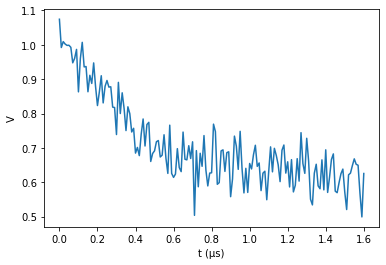

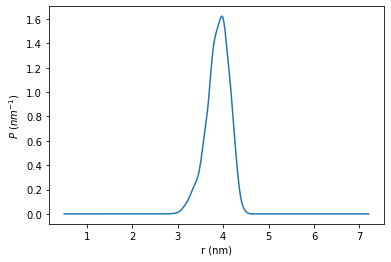

In [ ]:
plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')
plt.show()

P0s = loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['P0']
rref = np.squeeze(loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['r0'])
Pref = P0s[Pid-1,:]

plt.plot(rref, Pref)
plt.xlabel('r (nm)')
plt.ylabel(r'$P~(nm^{-1})$')
plt.show()



## Regularization

In [ ]:
pars = {"method": 'regularization', "r": np.linspace(2,6,200)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 8000,"tune": 2000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

Sequential sampling (4 chains in 1 job)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Sampling 1 chain for 56 tune and 0 draw iterations (56 + 0 draws total) took 10 seconds.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
No posterior samples. Unable to run convergence checks


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.074,0.034,0.000,0.124,0.003,0.002,105.0,145.0,1.04
λ,0.305,0.027,0.260,0.361,0.003,0.002,113.0,206.0,1.06
V₀,0.946,0.015,0.920,0.975,0.002,0.001,84.0,21.0,1.03
σ,0.044,0.003,0.039,0.051,0.001,0.001,13.0,31.0,1.23
δ,696686.726,801297.582,7540.055,2209311.438,116288.462,85295.982,51.0,49.0,1.07
lg(α),1.427,0.266,0.908,1.897,0.039,0.028,45.0,43.0,1.09


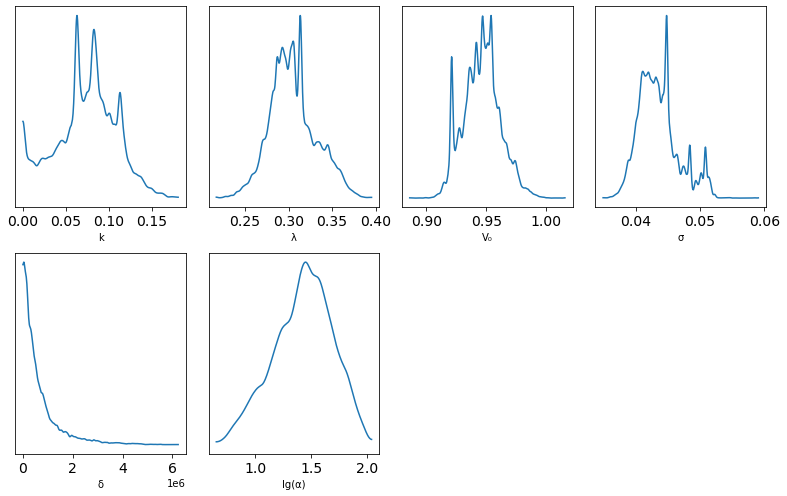

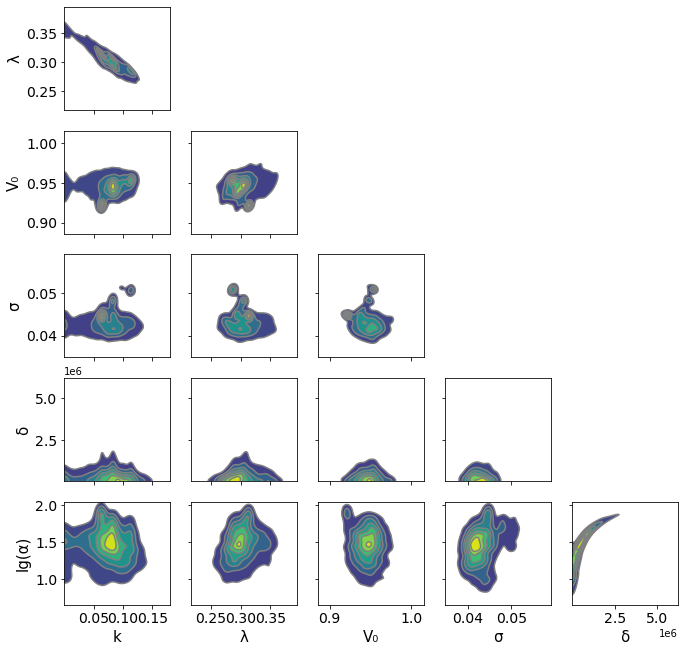

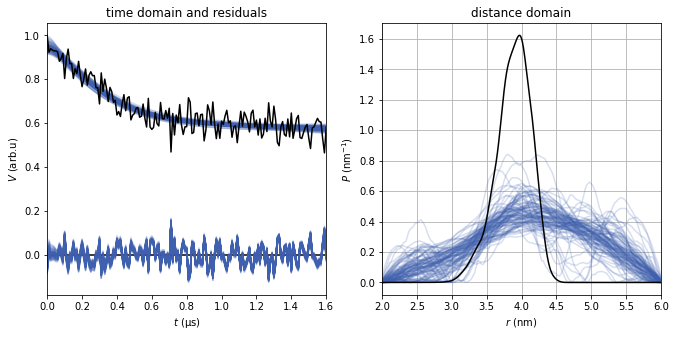

In [ ]:
dive.summary(trace, model, Pid = Pid)  

## Single Gaussian

In [7]:
pars_gauss = {"method": 'gaussian', "r": np.linspace(2,6,200), 'nGauss': 1}

model_gauss = dive.model(t, Vexp, pars_gauss)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace_gauss = dive.sample(model_gauss,MCMCparameters)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, V0, lamb, k, w, r0_rel]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 522 seconds.
There were 689 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6357526297434046, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2351 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3361729425898744, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9117482499523594, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8832841718484417, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
r0[0],4.053,0.120,3.830,4.297,0.010,0.007,132.0,45.0,1.03
w[0],1.050,0.650,0.057,2.279,0.072,0.051,64.0,32.0,1.03
k,0.152,0.053,0.037,0.235,0.005,0.004,90.0,137.0,1.02
λ,0.240,0.047,0.165,0.339,0.005,0.003,84.0,174.0,1.02
V₀,0.940,0.017,0.909,0.974,0.002,0.001,99.0,59.0,1.03
σ,0.047,0.003,0.042,0.052,0.000,0.000,194.0,583.0,1.01


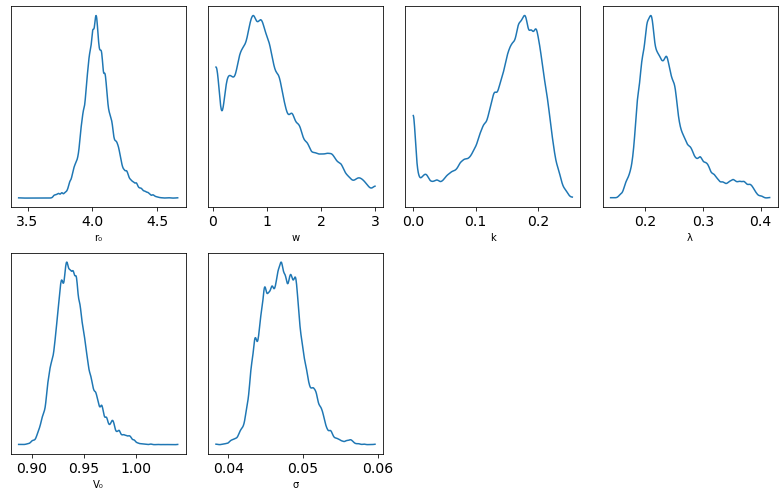

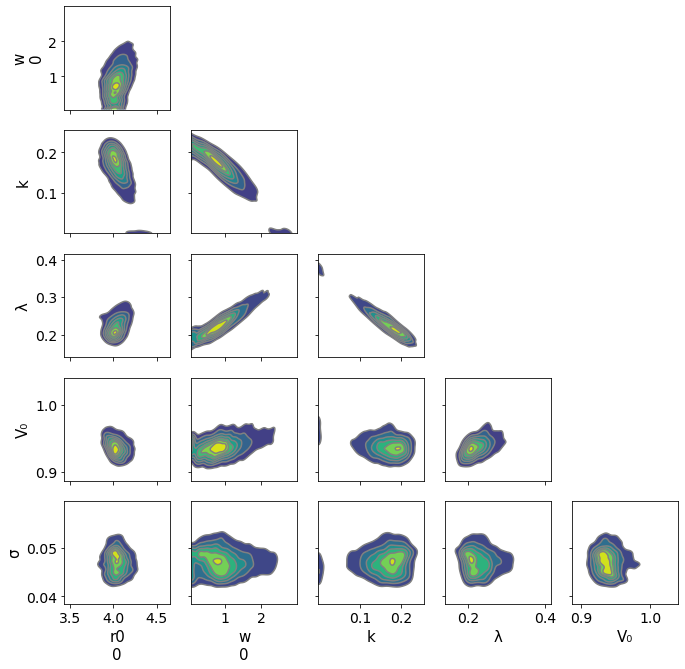

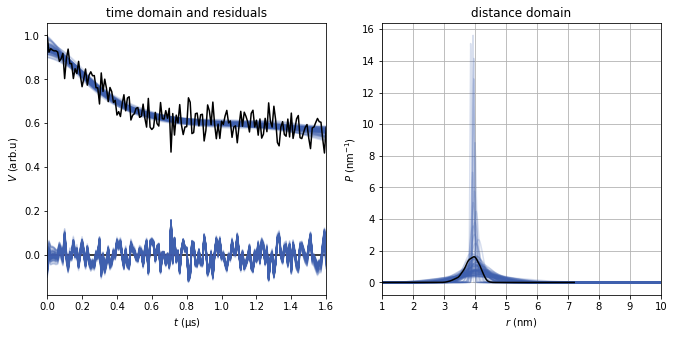

In [9]:
dive.summary(trace_gauss, model_gauss, Pid = Pid)  